In [4]:
import matplotlib.pyplot as plt
import numpy as np
from graspy.simulations import sbm
from numpy.random import normal, poisson
from scipy.stats import norm
import random
import itertools
%matplotlib inline

In [5]:
N = 300 #total nodes
k = 12 #community number
P = .25

In [6]:
nodesPerCom = int(N/k)
n = [nodesPerCom]*k
activeNodes = [4,7]
differentiatingEdge = int(nodesPerCom**2*len(activeNodes)**2*P)
indx = []

for i in activeNodes:
    indx = np.append(indx,range((i-1)*nodesPerCom, i*nodesPerCom-1), axis = 0)
    
indx_ = list(itertools.product(indx,indx)) 
indx__ = random.sample(indx_, differentiatingEdge)


DiffEdge = norm.rvs(size=len(indx__),loc=0.2,scale=0.18)

p = [[0.2]*k]*k
wt = [[normal]*k]*k
wtargs = []

for i in range(0,k):
    wtargs.append([])
    for j in range(0,k):
        if i!=j:
            wtargs[i].append({'loc': 0.1, 'scale': 0.18})
        else:
            wtargs[i].append({'loc': 0.3, 'scale': 0.18})

G = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

G1 = G.copy()
for i in range(0,len(indx__)):
    G[int(indx__[i][0]),int(indx__[i][1])] = DiffEdge[i]

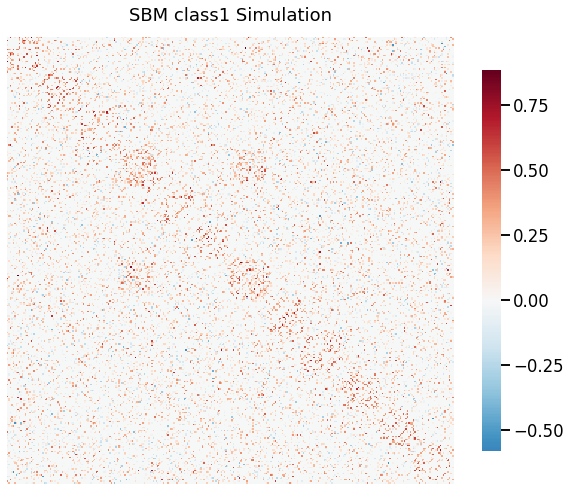

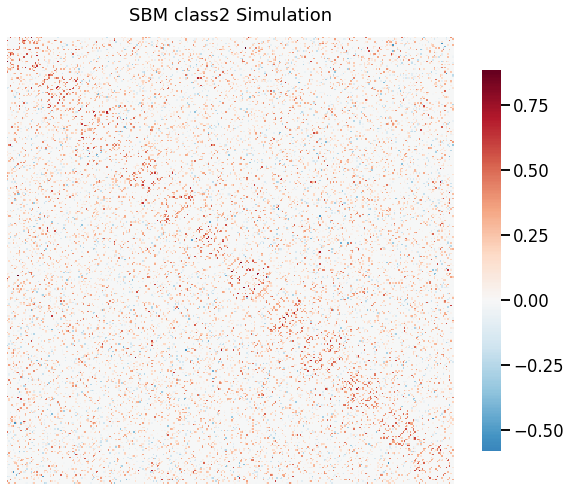

In [7]:
from graspy.plot import heatmap

heatmap(G, title ='SBM class1 Simulation')
heatmap(G1, title ='SBM class2 Simulation')

In [8]:
print(type(G))

<class 'numpy.ndarray'>
